# Run-Workouts Data

In [1]:
import datetime as dt

In [2]:
import pathlib

In [3]:
import pandas as pd

In [4]:
home = pathlib.Path.home()

In [5]:
date_partition = "20200927"

In [6]:
data_input_path = f"{home}/small-data/apple-health-csv/full-extract/{date_partition}"

In [7]:
study_path = f"{home}/small-data/study/running-stories/{date_partition}"

In [8]:
pathlib.Path(study_path).mkdir(parents=True,exist_ok=True)

In [9]:
workout = pd.read_csv(f"{data_input_path}/workout.csv",parse_dates=['startDate'], infer_datetime_format=True)

## Extract Runs From Workout Data

In [10]:
date_lowerbound = dt.datetime(2018,10, 17).astimezone()

In [11]:
date_upperbound = dt.datetime(2020,9,27).astimezone() #  use local time zone

In [12]:
runs = workout.loc[(workout['workoutActivityType'] == 'HKWorkoutActivityTypeRunning') & 
                   (workout['startDate'] >= date_lowerbound) &
                   (workout['startDate'] < date_upperbound), 
                   ['totalDistance', 'startDate',  'HKIndoorWorkout']]

In [13]:
runs.loc[:,'HKIndoorWorkout'] = runs['HKIndoorWorkout'].apply(lambda x: True if x == 1.0 else False)

In [14]:
runs = runs.rename(columns={
    'startDate': 'start_date',
    'totalDistance': 'miles',
    'HKIndoorWorkout': 'indoor_run'
})
                  

In [15]:
runs['year'] = runs['start_date'].map(lambda x: x.year)

In [16]:
runs['treadmill'] = runs.loc[runs['indoor_run'] == True, "miles"]

In [17]:
runs['outdoor'] = runs.loc[runs['indoor_run'] == False, "miles"]

In [18]:
del runs['indoor_run']

In [19]:
runs

,miles,start_date,year,treadmill,outdoor
1,2.499776,2018-10-17 20:24:57-07:00,2018,2.499776,NaN
48,2.859052,2018-12-05 20:05:36-08:00,2018,2.859052,NaN
52,1.488184,2018-12-09 16:51:38-08:00,2018,1.488184,NaN
80,1.011271,2018-12-27 14:08:00-08:00,2018,NaN,1.011271
82,1.009481,2018-12-27 14:35:21-08:00,2018,NaN,1.009481
...,...,...,...,...,...
1308,4.398326,2020-09-22 19:04:14-07:00,2020,NaN,4.398326
1309,3.966039,2020-09-23 18:51:23-07:00,2020,NaN,3.966039
1310,3.338409,2020-09-24 18:56:54-07:00,2020,NaN,3.338409
1312,6.641051,2020-09-25 18:24:08-07:00,2020,NaN,6.641051


## Annual Run Miles

In [20]:
runstats = runs.groupby(by=runs['year']).sum()

In [21]:
runstats # show table data

,miles,treadmill,outdoor
year,,,
2018,14.698636,6.847012,7.851623
2019,416.403220,342.333181,74.070039
2020,731.973951,58.569700,673.404251


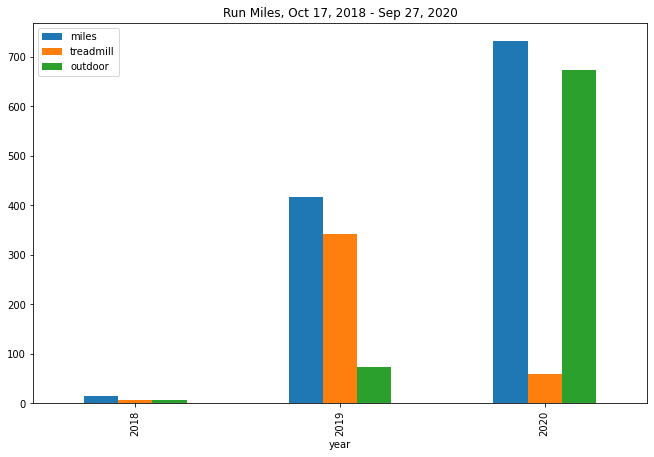

In [22]:
runstats_bp = runstats.plot.bar(y=['miles', 'treadmill', 'outdoor'], 
                                title='Run Miles, Oct 17, 2018 - Sep 27, 2020', 
                                figsize=(11, 7))

In [23]:
runstats_bp.get_figure().savefig(f"{study_path}/annual_run_miles")

### Annual Minimum 5K Runs

In [24]:
runs_5k_min = runs.loc[runs['miles'] >= 3.10]

In [25]:
runs_5k_min_by_year = runs_5k_min.groupby('year').count()

In [26]:
runs_5k_min_by_year

,miles,start_date,treadmill,outdoor
year,,,,
2018,1,1,0,1
2019,55,55,44,11
2020,125,125,0,125


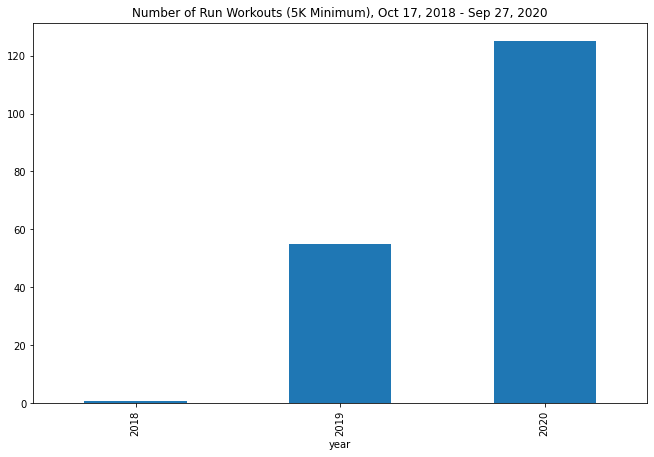

In [27]:
runstats_5k_min_bp = runs_5k_min_by_year.plot.bar(y='miles', legend=False, 
                                                  title='Number of Run Workouts (5K Minimum), Oct 17, 2018 - Sep 27, 2020', 
                                                  figsize=(11, 7))

In [28]:
runstats_5k_min_bp.get_figure().savefig(f"{study_path}/annual_runs_5k_min")

## Annual Minimum 10K Runs

In [29]:
runs_10k_min = runs.loc[runs['miles'] >= 6.20]

In [30]:
runs_10k_min_by_year = runs_10k_min.groupby('year').count()

In [31]:
runs_10k_min_by_year

,miles,start_date,treadmill,outdoor
year,,,,
2019,4,4,0,4
2020,29,29,0,29


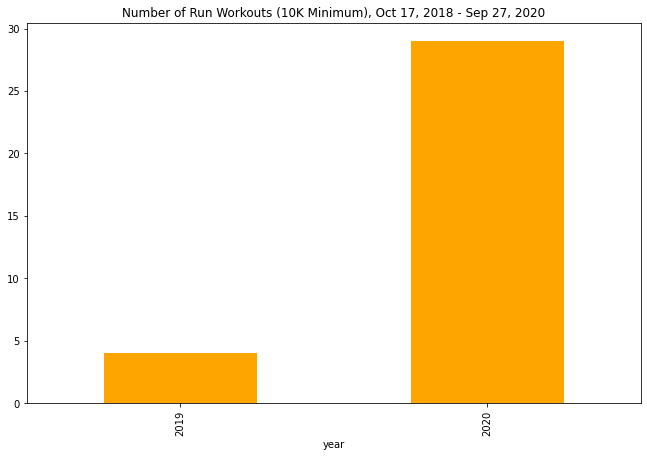

In [32]:
runstats_10k_min_bp = runs_10k_min_by_year.plot.bar(y='miles', color='orange', 
                                                    legend=False, 
                                                    title='Number of Run Workouts (10K Minimum), Oct 17, 2018 - Sep 27, 2020', 
                                                    figsize=(11, 7))

In [33]:
runstats_10k_min_bp.get_figure().savefig(f"{study_path}/annual_runs_10k_min")

In [39]:
covidlockdown_miles = runs[runs['start_date'] >= dt.datetime(2020,3,17).astimezone()]

In [41]:
covidlockdown_miles.describe()

,miles,year,treadmill,outdoor
count,151.000000,151.0,0.0,151.000000
mean,4.440844,2020.0,NaN,4.440844
std,1.783956,0.0,NaN,1.783956
min,0.143550,2020.0,NaN,0.143550
25%,3.234716,2020.0,NaN,3.234716
50%,4.431436,2020.0,NaN,4.431436
75%,5.627641,2020.0,NaN,5.627641
max,9.333681,2020.0,NaN,9.333681


In [42]:
covidlockdown_miles.sum()

miles           670.567492
year         305020.000000
treadmill         0.000000
outdoor         670.567492
dtype: float64

In [43]:
dt.datetime.today() - dt.datetime(2020,3, 17)

datetime.timedelta(days=194, seconds=46638, microseconds=290216)